<a href="https://colab.research.google.com/github/devangi2000/TensorFlow01/blob/master/horses_or_humans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import zipfile

In [25]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2020-06-11 16:30:26--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.215.128, 2607:f8b0:400c:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.215.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   174MB/s    in 0.8s    

2020-06-11 16:30:27 (174 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [0]:
local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [0]:
train_horses = os.path.join('/tmp/horse-or-human/horses')
train_humans = os.path.join('/tmp/horse-or-human/humans')

In [28]:
train_horse_names = os.listdir(train_horses)
print(train_horse_names[:10])
train_human_names = os.listdir(train_humans)
print(train_human_names[:10])

['horse04-3.png', 'horse29-2.png', 'horse32-1.png', 'horse09-5.png', 'horse48-4.png', 'horse50-9.png', 'horse35-4.png', 'horse36-0.png', 'horse30-5.png', 'horse26-8.png']
['human15-08.png', 'human15-21.png', 'human10-23.png', 'human07-14.png', 'human17-04.png', 'human12-23.png', 'human03-06.png', 'human07-00.png', 'human02-18.png', 'human03-24.png']


In [29]:
print('Training horse Names:', len(train_horse_names))
print('Training human Names:', len(train_human_names))

Training horse Names: 500
Training human Names: 527


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index=0

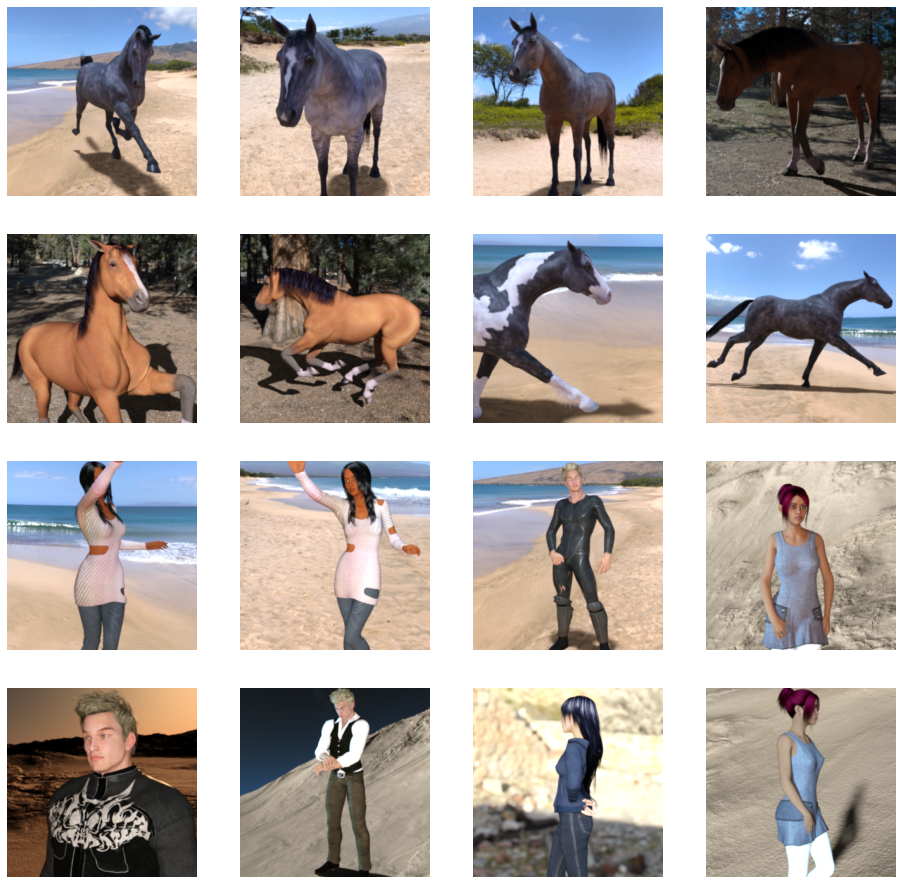

In [31]:
fig = plt.gcf()
fig.set_size_inches(nrows*4, ncols*4)
pic_index += 8

next_horse = [os.path.join(train_horses, fname) for fname in train_horse_names[pic_index-8:pic_index]]
next_human = [os.path.join(train_humans, fname) for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse + next_human):
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [0]:
import tensorflow as tf

In [0]:
model = tf.keras.models.Sequential([
            tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300,300,3)),
            tf.keras.layers.MaxPooling2D(2,2),

            tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),

            tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),

            tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),

            tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
            tf.keras.layers.MaxPooling2D(2,2),

            tf.keras.layers.Flatten(),
            
            tf.keras.layers.Dense(512, activation='relu'),
            tf.keras.layers.Dense(1, activation='sigmoid')
])

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 33, 33, 64)       

In [0]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

### ***DATA PREPROCESSING:***

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data = ImageDataGenerator(rescale=1/255.0)

train_generator = train_data.flow_from_directory(
  '/tmp/horse-or-human/',
  target_size=(300,300),
  batch_size=128,
  class_mode='binary'
)

Found 1027 images belonging to 2 classes.


In [37]:
history = model.fit(
    train_generator,
    steps_per_epoch = 4,
    verbose = 1,
    epochs=15
)

Epoch 1/15
4/4 [==============================] - 32s 8s/step - loss: 1.2799 - accuracy: 0.5156
Epoch 2/15
4/4 [==============================] - 31s 8s/step - loss: 0.6774 - accuracy: 0.6387
Epoch 3/15
4/4 [==============================] - 22s 5s/step - loss: 0.7311 - accuracy: 0.5478
Epoch 4/15
4/4 [==============================] - 22s 6s/step - loss: 1.9594 - accuracy: 0.6202
Epoch 5/15
4/4 [==============================] - 31s 8s/step - loss: 0.5074 - accuracy: 0.9258
Epoch 6/15
4/4 [==============================] - 21s 5s/step - loss: 0.3293 - accuracy: 0.8786
Epoch 7/15
4/4 [==============================] - 32s 8s/step - loss: 0.2259 - accuracy: 0.9276
Epoch 8/15
4/4 [==============================] - 31s 8s/step - loss: 0.2192 - accuracy: 0.9160
Epoch 9/15
4/4 [==============================] - 32s 8s/step - loss: 0.1442 - accuracy: 0.9453
Epoch 10/15
4/4 [==============================] - 31s 8s/step - loss: 0.3834 - accuracy: 0.8203
Epoch 11/15
4/4 [======================

In [39]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
 

Saving download.jpg to download (2).jpg
[1.]
download.jpg is a human


In [23]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

NameError: ignored